In [177]:
!pip install mediapipe

In [178]:
import cv2
import mediapipe as mp
import os

In [179]:
mp_face_detection = mp.solutions.face_detection
mp_drawing = mp.solutions.drawing_utils

In [180]:
from PIL import Image

In [181]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [182]:
#사진폴더가 인식이 됐는지 확인하기
os.listdir('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/test_data/summer')

['아이린2.jpg',
 '아이린8.jpg',
 '아이린4.jpg',
 '아이린3.jpg',
 '아이린1.jpg',
 '아이린.png',
 '아이린.jpg',
 '차은우2.jpg',
 '아이린7.jpg',
 '아이린5.jpg',
 '아이린6.jpg',
 '아이린9.jpg',
 '차은우.jpg',
 '차은우4.jpg',
 '차은우6.jpg',
 '차은우9.jpg',
 '차은우5.jpg',
 '차은우7.jpg',
 '차은우8.jpg',
 '차은우3.jpg',
 '차은우1.jpg']

In [183]:
def making(file):
    eye_list = []
    nose_list = []
    mouse_list = []
    IMAGE_FILES = []
    a = os.listdir(file)
    for i in a:
        image_path = file+'/'+ i
        IMAGE_FILES.append(image_path)

    with mp_face_detection.FaceDetection(model_selection=1, min_detection_confidence=0.5) as face_detection:
        for idx, files in enumerate(IMAGE_FILES):
            image = cv2.imread(files)
            # 작업 전에 BGR 이미지를 RGB로 변환합니다.
            results = face_detection.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            # 이미지를 출력하고 그 위에 얼굴 박스를 그립니다.
            if not results.detections:
                continue
            annotated_image = image.copy()

            for detection in results.detections:

                eye = mp_face_detection.get_key_point(
                    detection, mp_face_detection.FaceKeyPoint.LEFT_EYE)

                nose = mp_face_detection.get_key_point(
                    detection, mp_face_detection.FaceKeyPoint.NOSE_TIP)

                mouse = mp_face_detection.get_key_point(
                    detection, mp_face_detection.FaceKeyPoint.MOUTH_CENTER)

                # 이미지 열기
                image = Image.open(files)

                # 이미지 크기 얻기
                image_width, image_height = image.size

                # 상대 좌표
                e_relative_x = eye.x
                e_relative_y = eye.y

                n_relative_x = nose.x
                n_relative_y = nose.y

                m_relative_x = mouse.x
                m_relative_y = mouse.y


                # 눈
                e_absolute_x = int(e_relative_x * image_width)
                e_absolute_y = int(e_relative_y * image_height)

                e_rgb_value = image.getpixel((e_absolute_x, e_absolute_y))

                if len(e_rgb_value) == 4:
                    eye_list.append(e_rgb_value[0:3])
                else:
                    eye_list.append(e_rgb_value)

                # 코
                n_absolute_x = int(n_relative_x * image_width)
                n_absolute_y = int(n_relative_y * image_height)

                n_rgb_value = image.getpixel((n_absolute_x, n_absolute_y))
                if len(n_rgb_value) == 4:
                    nose_list.append(n_rgb_value[0:3])
                else:
                    nose_list.append(n_rgb_value)


                # 입
                m_absolute_x = int(m_relative_x * image_width)
                m_absolute_y = int(m_relative_y * image_height)

                # 절대 좌표에서 RGB 값 추출
                m_rgb_value = image.getpixel((m_absolute_x, m_absolute_y))
                if len(m_rgb_value) == 4:
                    mouse_list.append(m_rgb_value[0:3])
                else:
                    mouse_list.append(m_rgb_value)

    return eye_list,nose_list,mouse_list


In [250]:
#rgb값 뽑아주는 코드 (a:눈, b:코 c:입)
a,b,c=making('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/sumin')

print(len(os.listdir('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/test_data/summer')))
print(len(a))

In [213]:
def make_total(file,name,num):
    a,b,c=making(file)
    name=make_df(a,b,c)
    name['tone']=num
    name_df= pd.DataFrame(os.listdir(file),columns=['name'])
    name=pd.concat([name,name_df],axis=1)

    return name

In [214]:
fall = make_total('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/test_data/fall','fall',2)
summer = make_total('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/test_data/summer','summer',1)
spring = make_total('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/test_data/spring','spring',0)
winter = make_total('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/test_data/winter','winter',3)


test_df = pd.concat([spring,summer,fall,winter]).reset_index(drop=True)
test_df

,eye_R,eye_G,eye_B,nose_R,nose_G,nose_B,mouse_R,mouse_G,mouse_B,tone,name
0,66,46,47,146,118,97,155,40,53,0,한지민7.jpg
1,80,71,64,200,171,153,98,30,29,0,한지민6.jpg
2,30,35,41,96,76,69,171,138,155,0,한지민8.jpg
3,112,68,69,73,28,7,206,136,146,0,한지민9.jpg
4,181,151,143,234,189,183,219,209,199,0,한지민5.jpg
5,55,25,17,209,175,166,220,201,187,0,한지민4.jpg
6,57,18,11,217,151,135,211,87,95,0,한지민3.jpg
7,118,80,69,217,169,155,224,204,197,0,한지민2.jpg
8,67,56,60,212,179,170,151,120,125,0,한지민1.jpg
9,79,65,65,193,156,140,203,109,110,0,한지민.jpg


In [ ]:
#데이터 프레임 만들어서 csv 만들기 (굳이 안해도 됌)
df_spring = make_df(a,b,c)
df_spring['tone'] = 0

df_spring['name'] = '한지민'

df_spring


,eye_R,eye_G,eye_B,nose_R,nose_G,nose_B,mouse_R,mouse_G,mouse_B,tone,name
0,66,46,47,146,118,97,155,40,53,0,한지민
1,80,71,64,200,171,153,98,30,29,0,한지민
2,30,35,41,96,76,69,171,138,155,0,한지민
3,112,68,69,73,28,7,206,136,146,0,한지민
4,181,151,143,234,189,183,219,209,199,0,한지민
5,55,25,17,209,175,166,220,201,187,0,한지민
6,57,18,11,217,151,135,211,87,95,0,한지민
7,118,80,69,217,169,155,224,204,197,0,한지민
8,67,56,60,212,179,170,151,120,125,0,한지민
9,79,65,65,193,156,140,203,109,110,0,한지민


In [ ]:
# 데이터 프레임 만드는 코드
import numpy as np
import pandas as pd

def make_df(eye,nose,mouse):

    df1= pd.DataFrame(eye,columns=['eye_R','eye_G','eye_B'])
    df2= pd.DataFrame(nose,columns=['nose_R','nose_G','nose_B'])
    df3= pd.DataFrame(mouse,columns=['mouse_R','mouse_G','mouse_B'])

    df = pd.concat([df1,df2,df3],axis=1)

    return df


In [ ]:
a= pd.DataFrame(np.array(a),columns=['eye_R','eye_G','eye_B'])
b= pd.DataFrame(np.array(b),columns=['nose_R','nose_G','nose_B'])
c= pd.DataFrame(np.array(c),columns=['mouse_R','mouse_G','mouse_B'])



In [ ]:
df = pd.concat([a,b,c],axis=1)
df
df.to_csv('수민이누나.csv')

In [192]:
#전체 rgb 데이터
train_df = pd.read_csv('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/bio_data.csv')
train_df.drop('Unnamed: 0',axis=1,inplace=True)
train_df['tone'].value_counts()

1    1193
3    1168
2    1088
0     896
Name: tone, dtype: int64

In [ ]:
# 테스트 데이터 rgb 데이터
friend_df = pd.read_csv('/content/sumin.csv')
friend_df.drop('Unnamed: 0',axis=1,inplace=True)
friend_df

# 모델 셋팅

# 1.LogisticRegression

# 2.RandomForest

# 3.RandomForest

# 4.RandomForest

#

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/bio_data.csv')
train_df.drop('Unnamed: 0',axis=1,inplace=True)
train_df['tone'].value_counts()

1    1193
3    1168
2    1088
0     896
Name: tone, dtype: int64

In [194]:
target = train_df['tone']
train =  train_df.drop('tone',axis=1)

In [193]:
from sklearn.linear_model import SGDClassifier,LogisticRegression

In [196]:
SGD = SGDClassifier(max_iter=100)
Logistic = LogisticRegression(max_iter=100)

In [216]:
SGD.fit(train,target)
Logistic.fit(train,target)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [221]:
pred = Logistic.predict(test_df.drop(['tone','name'],axis=1))

prob = Logistic.predict_proba(test_df.drop(['tone','name'],axis=1))
prob

result_df = pd.DataFrame(prob,columns=['lr_spring','lr_summer','lr_fall','lr_winter'])
result_df

result_df = round(result_df*100)
result_df['predict'] = pred
result_df['actual'] = test_df['tone']
result_df['match'] = result_df['predict'] == result_df['actual']


result_df = pd.concat([result_df,test_df['name']],axis=1)

result_df.dropna(inplace=True)
result_df

,lr_spring,lr_summer,lr_fall,lr_winter,predict,actual,match,name
0,48.0,52.0,0.0,0.0,1,0,False,한지민7.jpg
1,46.0,53.0,0.0,0.0,1,0,False,한지민6.jpg
2,42.0,47.0,4.0,7.0,1,0,False,한지민8.jpg
3,27.0,63.0,5.0,5.0,1,0,False,한지민9.jpg
4,2.0,3.0,45.0,51.0,3,0,False,한지민5.jpg
5,2.0,3.0,36.0,60.0,3,0,False,한지민4.jpg
6,48.0,52.0,0.0,0.0,1,0,False,한지민3.jpg
7,6.0,15.0,35.0,44.0,3,0,False,한지민2.jpg
8,34.0,52.0,7.0,8.0,1,0,False,한지민1.jpg
9,50.0,46.0,2.0,2.0,0,0,True,한지민.jpg


In [283]:
true_count= np.sum(result_df['match']==True)
false_count= np.sum(result_df['match']==False)

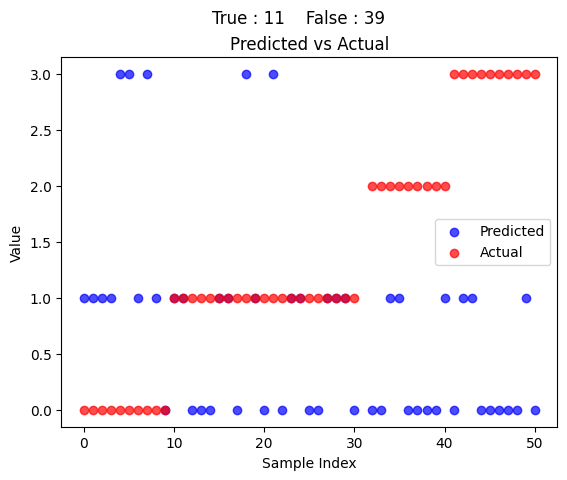

In [287]:
import matplotlib.pyplot as plt

plt.scatter(result_df.index,result_df['predict'],label='Predicted', alpha=0.7, color='b')
plt.scatter(result_df.index,result_df['actual'], label='Actual', alpha=0.7, color='r')

plt.title('Predicted vs Actual')
plt.suptitle(f'True : {true_count}    False : {false_count} ')
plt.xlabel('Sample Index')
plt.ylabel('Value')


plt.legend()

In [222]:
result_df.to_csv('result.csv')

In [ ]:
test_df.drop(['tone','name'],axis=1)

,index,eye_R,eye_G,eye_B,nose_R,nose_G,nose_B,mouse_R,mouse_G,mouse_B
0,0,66,46,47,146,118,97,155,40,53
1,1,80,71,64,200,171,153,98,30,29
2,2,30,35,41,96,76,69,171,138,155
3,3,112,68,69,73,28,7,206,136,146
4,4,181,151,143,234,189,183,219,209,199
5,5,55,25,17,209,175,166,220,201,187
6,6,57,18,11,217,151,135,211,87,95
7,7,118,80,69,217,169,155,224,204,197
8,8,67,56,60,212,179,170,151,120,125
9,9,79,65,65,193,156,140,203,109,110


In [241]:
pred

array([1, 1, 1, 1, 3, 3, 1, 3, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 3, 1, 0, 3,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0])

In [ ]:
os.listdir('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/test_data/fall')

['민지5.jpg',
 '민지9.jpg',
 '민지6.jpg',
 '민지8.jpg',
 '민지7.jpeg',
 '민지4.jfif',
 '민지2.jpg',
 '민지10.jpg',
 '민지1.jpg']

In [ ]:
test_df_temp = test_df.drop(['tone','name'],axis=1)
test_df_temp

,eye_R,eye_G,eye_B,nose_R,nose_G,nose_B,mouse_R,mouse_G,mouse_B
0,66,46,47,146,118,97,155,40,53
1,80,71,64,200,171,153,98,30,29
2,30,35,41,96,76,69,171,138,155
3,112,68,69,73,28,7,206,136,146
4,181,151,143,234,189,183,219,209,199
5,55,25,17,209,175,166,220,201,187
6,57,18,11,217,151,135,211,87,95
7,118,80,69,217,169,155,224,204,197
8,67,56,60,212,179,170,151,120,125
9,79,65,65,193,156,140,203,109,110


In [274]:

df= make_df(a,b,c)
df['tone'] = 0

In [ ]:
def change_name(num):
    data = ''
    if num == 0:
        data='spring_warm'
    elif num==1:
        data='summer_cool'
    elif num==2:
        data='fall_warm'
    else:
        data='winter_cool'
    return data

In [297]:
def pre_show(file):
    a,b,c = making(file)
    test_df = make_df(a,b,c)
    pred2= Logistic.predict(test_df)
    #pred2= Logistic.predict(df.drop('tone',axis=1))
    unique_values, counts = np.unique(pred2, return_counts=True)
    unique_values
    most_common_index = np.argmax(counts)
    most_common_value = unique_values[most_common_index]
    most_common_value

    plt.figure(figsize=(20,10))
    li1 = os.listdir(file)
    img_test = img.imread(file+'/'+li1[1])
    plt.title(f'Predict_Tone: {change_name(most_common_value)}')
    plt.imshow(img_test)
    plt.show()

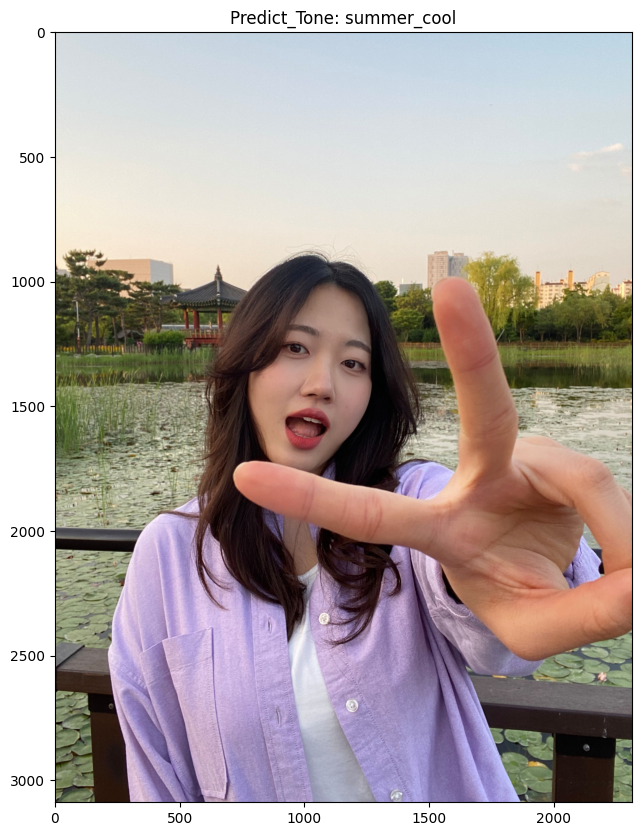

In [298]:
pre_show('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/다예')

In [275]:
act = df.loc[0,'tone']

In [265]:
def change_name(num):
    data = ''
    if num == 0:
        data='spring_warm'
    elif num==1:
        data='summer_cool'
    elif num==2:
        data='fall_warm'
    else:
        data='winter_cool'
    return data

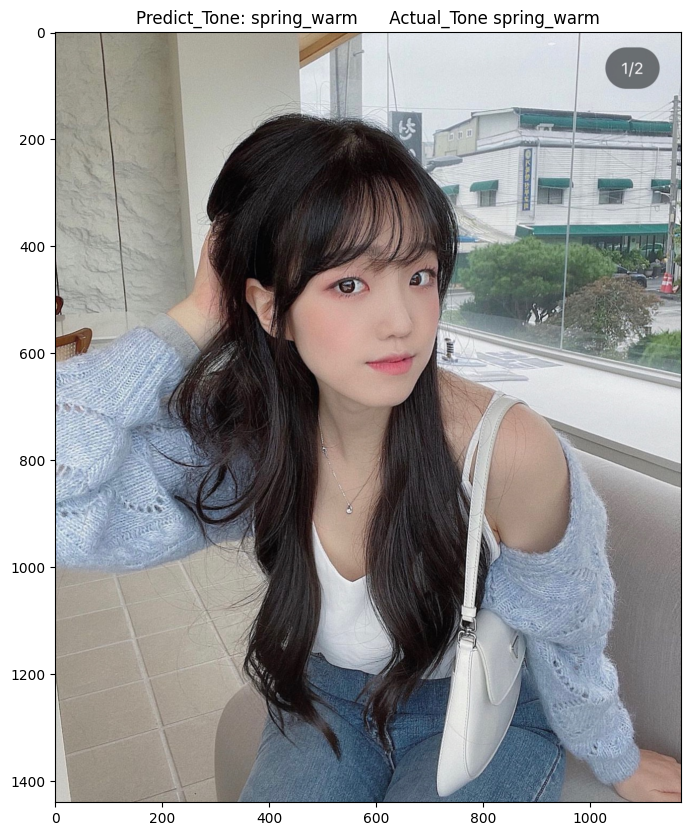

In [288]:
import matplotlib.pyplot as plt
import matplotlib.image as img


plt.figure(figsize=(20,10))
img_test = img.imread('/content/drive/MyDrive/Project_데이터분석/0717_3_퍼스널컬러인공지능/sumin/KakaoTalk_20230720_090405094.jpg')
plt.title(f'Predict_Tone: {change_name(most_common_value)}      Actual_Tone {change_name(act)}')
plt.imshow(img_test)
plt.show()